In [43]:
import sns
import pandas as pd
import sklearn
from sklearn.cluster import KMeans


data = pd.read_csv('data.csv')
#day of week, time, temperature, humidity, light on/off, aircon on/off, aircon temp, room, class
data.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]
data.head()

,day,hour,minute,temperature,humidity,light_state,aircon_state,aircon_temp,room,class
0,0,0,10,33.81,83.21,0,1,27,testRoom,wddh
1,0,0,20,27.32,85.62,0,1,27,testRoom,wddh
2,0,0,30,31.08,91.14,0,1,28,testRoom,wddh
3,0,0,40,33.91,88.28,0,1,24,testRoom,wddh
4,0,0,50,27.62,94.32,0,1,25,testRoom,wddh


# Clean up

In [44]:
data = data.drop(columns=["room"])
data.head()

,day,hour,minute,temperature,humidity,light_state,aircon_state,aircon_temp,class
0,0,0,10,33.81,83.21,0,1,27,wddh
1,0,0,20,27.32,85.62,0,1,27,wddh
2,0,0,30,31.08,91.14,0,1,28,wddh
3,0,0,40,33.91,88.28,0,1,24,wddh
4,0,0,50,27.62,94.32,0,1,25,wddh


In [45]:
data['class'] = data['class'].astype('category')
data.describe(include='category')
print(data["class"].unique())

i= 0
for unique in data["class"].unique():
    i += 1
clusters = i
print(clusters)

['wddh', 'wddc', 'wdnh', 'wdnc', 'wedh', 'wenh', 'wedc', 'wenc']
Categories (8, object): ['wddc', 'wddh', 'wdnc', 'wdnh', 'wedc', 'wedh', 'wenc', 'wenh']
8


In [49]:
clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)


data.head(25)

TypeError: KMeans.__init__() got an unexpected keyword argument 'n_jobs'

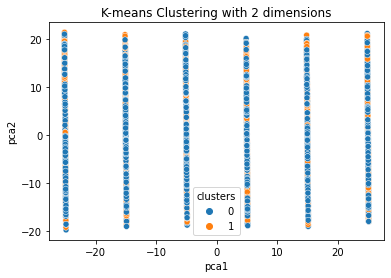

In [47]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca_num_components = 2
data = data.drop(columns=["class"])
reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()